**<h1>Data Preparation and Exploration** <br/>
<h4>Importing Python libraries

In [40]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

**Reading CSV files, the file was downloaded from 'https://finance.yahoo.com/quote/NVDA/history/'**

In [41]:
df = pd.read_csv('NVDA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6319 entries, 0 to 6318
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6319 non-null   object 
 1   Open       6319 non-null   float64
 2   High       6319 non-null   float64
 3   Low        6319 non-null   float64
 4   Close      6319 non-null   float64
 5   Adj Close  6319 non-null   float64
 6   Volume     6319 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 345.7+ KB


**Statistical Data related to the stock trends, Mean stock value remained within 46-47 as the stock ramined latent till 2015 after listed in 1999**

In [42]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6319.000000,6319.000000,6319.000000,6319.000000,6319.000000,6.319000e+03
mean,46.333376,47.175939,45.474042,46.374007,46.112849,6.088707e+07
std,101.765032,103.557399,99.951474,101.896433,101.921125,4.347832e+07
min,0.348958,0.355469,0.333333,0.341146,0.312949,1.968000e+06
25%,2.735989,2.831666,2.662500,2.734583,2.508557,3.468740e+07
50%,4.500000,4.574167,4.416667,4.505000,4.173921,5.100720e+07
75%,39.210001,39.790001,38.360000,39.252499,38.898155,7.394820e+07
max,841.299988,876.950012,837.190002,852.369995,852.369995,9.230856e+08


**Feature engineering, adding new columns on the basis of Date after converting Date dtype from string to date object**

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] =  df['Date'].dt.day_name()
df['month_name'] = df['Date'].dt.month_name()
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

**Ploting graph to display the lowest and highest stock point in the history of the NVIDIA**

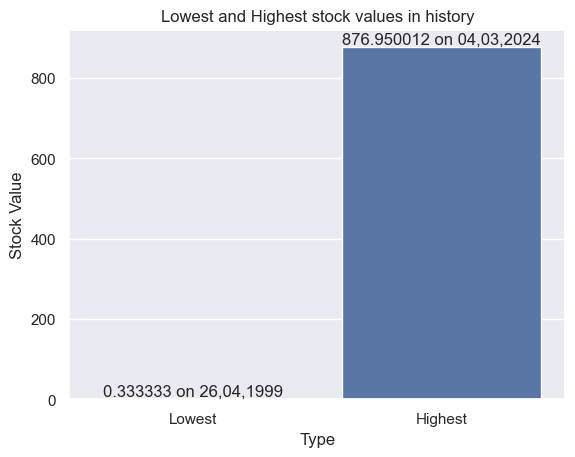

In [44]:
lowest_value, low_loc = df['Low'].min(), df['Low'].idxmin()
highest_value, high_loc = df['High'].max(), df['High'].idxmax()

# low_date =  datetime.strptime(df['Date'][low_loc], '%Y-%m-%d %H:%M:%S').strftime('%d,%m,%Y')
low_date = df['Date'][low_loc].strftime('%d,%m,%Y')
high_date = df['Date'][high_loc].strftime('%d,%m,%Y')

ax = sns.barplot(x=['Lowest', 'Highest'], y=[lowest_value, highest_value])
ax.set_title('Lowest and Highest stock values in history')
ax.set_ylabel('Stock Value')
ax.set_xlabel('Type')

lowval = str(lowest_value) + ' on ' + str(low_date)
highval= str(highest_value) + ' on ' + str(high_date)
# Annotate the bars with dates
ax.text(0, lowest_value, lowval , ha='center', va='bottom')
ax.text(1, highest_value, highval, ha='center', va='bottom')

# Show the plot
plt.show()

In [45]:
# Create a figure
fig = go.Figure()

# Add traces for each column (Open, High, Low, Close, Adj Close)
for column in ['Open', 'High', 'Low', 'Close']:
    fig.add_trace(go.Scatter(x=df['Date'], y=df[column], mode='lines+markers', name=column))

# Update layout
fig.update_layout(
    title="Stock Prices",
    xaxis_title="Date",
    yaxis_title="Price",
    showlegend=True,
    hovermode='x unified',
    xaxis=dict(type='date')  # Set x-axis type as 'date'
)

# Show the plot
fig.show()

**The stock was listed on January 22, 1999. From plot, we can clearly see that the stock remained latent till 2015 possible due to the demand of CPU by Intel. The stock saw upward trend after 2015 due to demands in GPU for gaming or other purpose. In 2022, there was a significant decline in the stock's value, likely influenced by the effects of the COVID-19 pandemic. After that the stock rebounded and resumed its upward trajectory, achieving new milestones. This could also be caused by the popularity of AI and need of high end GPU for model training.**

**<h4>Exploring the year in which Nvidia stock rose the most**

In [82]:
years = df['year'].unique()
stocks_yoy = dict(); Date = list(); Open = list(); Close = list(); Growth = list()
for year in years:
    open = df[df['year'] == year]['Open'].head(1).values[0]
    close = df[df['year'] == year]['Close'].tail(1).values[0]
    Date.append(year);    Open.append(open);    Close.append(close);    Growth.append(close - open)

stocks_yoy = {
    'Year':Date,
    'Open':Open,
    'Close':Close,
    'Growth':Growth
}

df1 = pd.DataFrame(stocks_yoy)
df1.head()

,Year,Open,Close,Growth
0,1999,0.437500,0.977865,0.540365
1,2000,0.984375,1.365234,0.380859
2,2001,1.375000,5.575000,4.200000
3,2002,5.599167,0.959167,-4.640000
4,2003,1.000000,1.933333,0.933333


In [80]:
# Create figure
fig2 = go.Figure()

# Add bars for growth
fig2.add_trace(go.Bar(
    x=df1['Year'],
    y=df1['Growth'],
    hoverinfo='x+name+y',
    marker_color=['blue' if g >= 0 else 'red' for g in df1['Growth']],
    name='Growth'
))

# Add open and close values on hover
hover_text = [f'Open: {o:.2f}<br>Close: {c:.2f}' for o, c in zip(df1['Open'], df1['Close'])]
fig2.update_traces(text=hover_text, textposition='outside')

# Update layout
fig2.update_layout(
    title='Yearly Growth in stock price',
    xaxis_title='Year',
    yaxis_title='Growth',
    hovermode='closest',
    width=1200,  # Set width of the figure
    height=600  # Set height of the figure
)

# Show the plot
fig2.show()

**Above graph dipslays the growth of stock within each year starting from Year 1999, on hovering user can see the growth value. Growth is calculated by the closing stock value of the last traiding day of the year - opening stock value of the first trading day of the year**

In [79]:
# Create a figure
fig1 = go.Figure()

# Add traces for all columns
for column in ['Open','Low','High','Close']:
    if column not in ['Date', 'Day', 'month_name']:
        fig1.add_trace(go.Scatter(x=df[df['year'] == 2024]['Date'], y=df[df['year'] == 2024][column], mode='lines+markers', name=column))

# Update layout
fig1.update_layout(
    title="Stock Prices during year 2024",
    xaxis_title="Date",
    yaxis_title="Value",
    showlegend=True,
    hovermode='x unified',
    xaxis=dict(type='date')  # Set x-axis type as 'date'
)

# Show the plot
fig1.show()


**Since, we now know that the in year 2024, stock saw the highest growth, so we are plotting the daily graph to showcase the trends of the stock**